<a href="https://colab.research.google.com/github/lari-guimaraes/Estudos-mar-o/blob/main/EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando base de dados

In [1]:
import pandas as pd

In [2]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
dados = pd.read_csv('tips.csv')

In [4]:
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [5]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [6]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [7]:
renomear = {'total_bill' : 'valor_da_conta',
            'tip' : 'gorjeta',
            'dessert' : 'sobremesa', 
            'day' : 'dia_da_semana', 
            'time' : 'hora_do_dia', 
            'size' : 'total_de_pessoas'}

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = { 'No' : 'não', 
           'Yes' : 'sim'}

In [12]:
gorjetas.sobremesa.map(sim_nao)

0      não
1      não
2      não
3      não
4      não
      ... 
239    não
240    sim
241    sim
242    não
243    não
Name: sobremesa, Length: 244, dtype: object

In [13]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [14]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Sun,Dinner,2
1,10.34,1.66,não,Sun,Dinner,3
2,21.01,3.50,não,Sun,Dinner,3
3,23.68,3.31,não,Sun,Dinner,2
4,24.59,3.61,não,Sun,Dinner,4


In [15]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
dias = {'Sun' : 'Domingo',
        'Sat' : 'Sábado', 
        'Thur' : 'Quinta',
        'Fri' : 'Sexta'}

In [17]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [18]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Dinner,2
1,10.34,1.66,não,Domingo,Dinner,3
2,21.01,3.50,não,Domingo,Dinner,3
3,23.68,3.31,não,Domingo,Dinner,2
4,24.59,3.61,não,Domingo,Dinner,4


In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {'Dinner' : 'Jantar', 
        'Lunch' : 'Almoço'}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [23]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Jantar,2
1,10.34,1.66,não,Domingo,Jantar,3
2,21.01,3.50,não,Domingo,Jantar,3
3,23.68,3.31,não,Domingo,Jantar,2
4,24.59,3.61,não,Domingo,Jantar,4


# Importando o Seaborn

In [25]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 12.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [26]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pandas, matplotlib, scipy
Required-by: missingno


# Análise 1 - Valor da conta e gorjeta

In [28]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

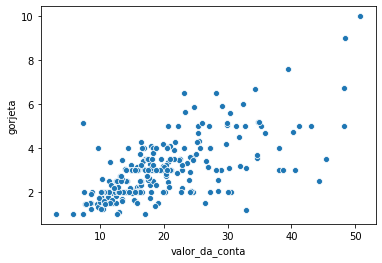

In [30]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [33]:
print('A base de daos contem {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de daos contem 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [34]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Jantar,2


In [35]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [37]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Jantar,2,0.059447
1,10.34,1.66,não,Domingo,Jantar,3,0.160542
2,21.01,3.50,não,Domingo,Jantar,3,0.166587
3,23.68,3.31,não,Domingo,Jantar,2,0.139780
4,24.59,3.61,não,Domingo,Jantar,4,0.146808


In [38]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [39]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Jantar,2,0.06
1,10.34,1.66,não,Domingo,Jantar,3,0.16
2,21.01,3.50,não,Domingo,Jantar,3,0.17
3,23.68,3.31,não,Domingo,Jantar,2,0.14
4,24.59,3.61,não,Domingo,Jantar,4,0.15


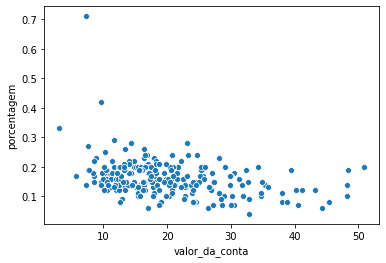

In [40]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y = 'porcentagem', data=gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da  gorjeta**

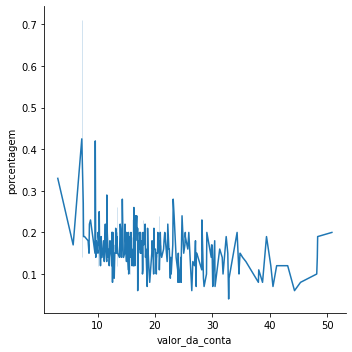

In [42]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y = 'porcentagem', kind = 'line', data=gorjetas)

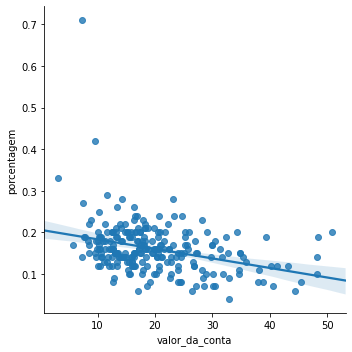

In [44]:
sns.lmplot(x='valor_da_conta', y = 'porcentagem', data=gorjetas)